In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt

# ALGORITMOS DE CLASIFICACION
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# LEE ARCHIVO CON LAS CARACTERISTICAS DE LOS AUDIOS
###################################################
Features = 'C:\\Data\\2_Preprocesamiento\\Pruebas_8\\Todos.csv'
dataframe = pd.read_csv(Features,sep=',')
#dataframe.head(10)
print(dataframe.groupby('especie').size())

especie
1-Amazona_farinosa                234
10_Hypocnemis_cantator            333
11_Hypocnemoides_melanopogon      196
12_Myrmotherula_ambigua            73
13_Myrmotherula_axillaris         161
14_Neopelma_chrysocephalum        269
15_Percnostola_rufifrons          143
16_Pionites_melanocephalus         49
17_Piprites_chloris                84
18_Ramphastos_tucanus             154
19_Ramphotrigon_ruficauda         182
2-Attila_citriniventris           233
20_Thamnomanes_caesius            168
21_Thamnophilus_amazonicus        179
22_Thamnophilus_murinus            73
23_Trogon_viridis                 169
24_Tyranneutes_stolzmanni         232
25_Willisornis_poecilinotus       221
3_Automolus_ochrolaemus           175
4_Capito_auratus                  286
5_Ceratopipra_erytrocephala       126
7_Galbula_leucogastra              51
8_Henicorhina_leucosticta          65
9_Herpsilochmus_dorsimaculatus     91
dtype: int64


In [3]:
# SELECCION DE LAS CARARTERISTICAS A ANALIZAR
###################################################
X=dataframe[['chroma_stft','chroma_cqt','chroma_cens', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'mfcc', 'melspectrogram', 'feature.tonnetz','onset_detect', 'rmse', 'zero_crossing_rate', 'spectral_flatness', 'pitch', 'freqmin','freqmax', 'duration']]  # Features
y=dataframe['especie']  # Labels

In [4]:
# SELECCIONA LOS DATOS DE ENTRENAMIENTO 80% Y DE TEST 20%
###################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [5]:
#sns.countplot(y,label='count')
#plt.show()

#X.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(12,18), 
#                                        title='Box Plot for each input variable')
#plt.savefig('Fature_box')
#plt.show()

In [6]:
# NORMALIZA LOS DATOS DE ENTRENAMIENTO Y DE TEST
####################################################
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

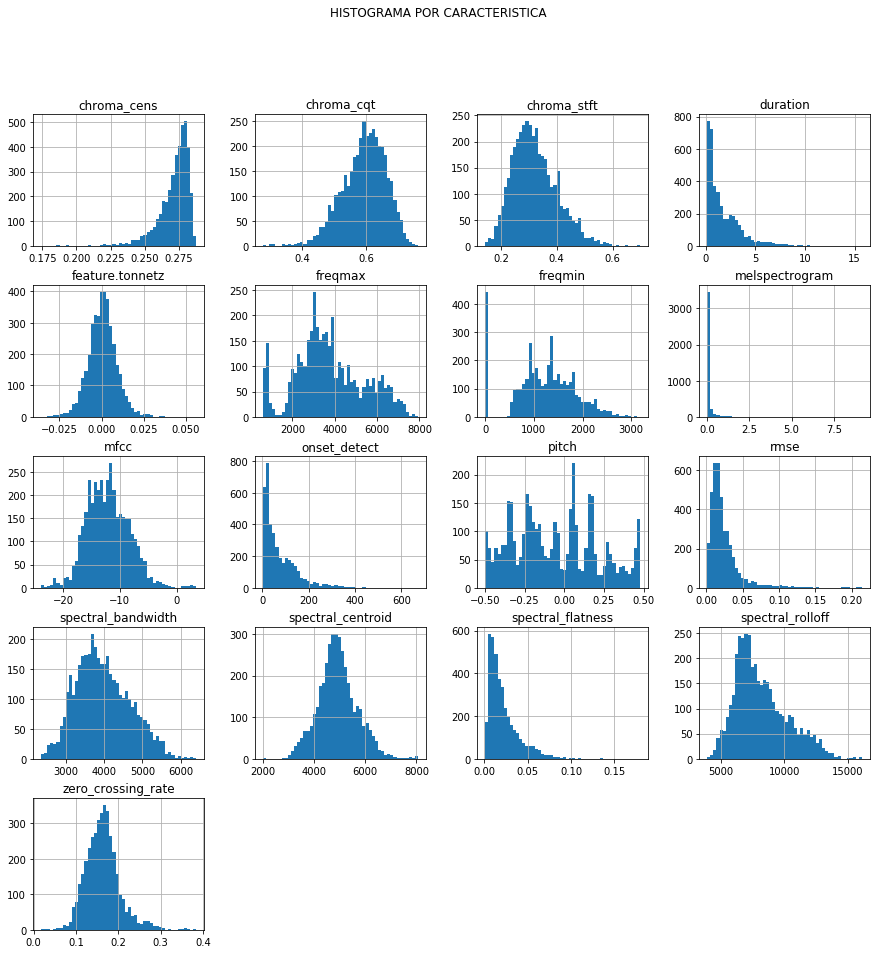

In [9]:
X.hist(bins=50, figsize=(15,15))
plt.suptitle("HISTOGRAMA POR CARACTERISTICA")
plt.savefig('Features_hist')
plt.show()

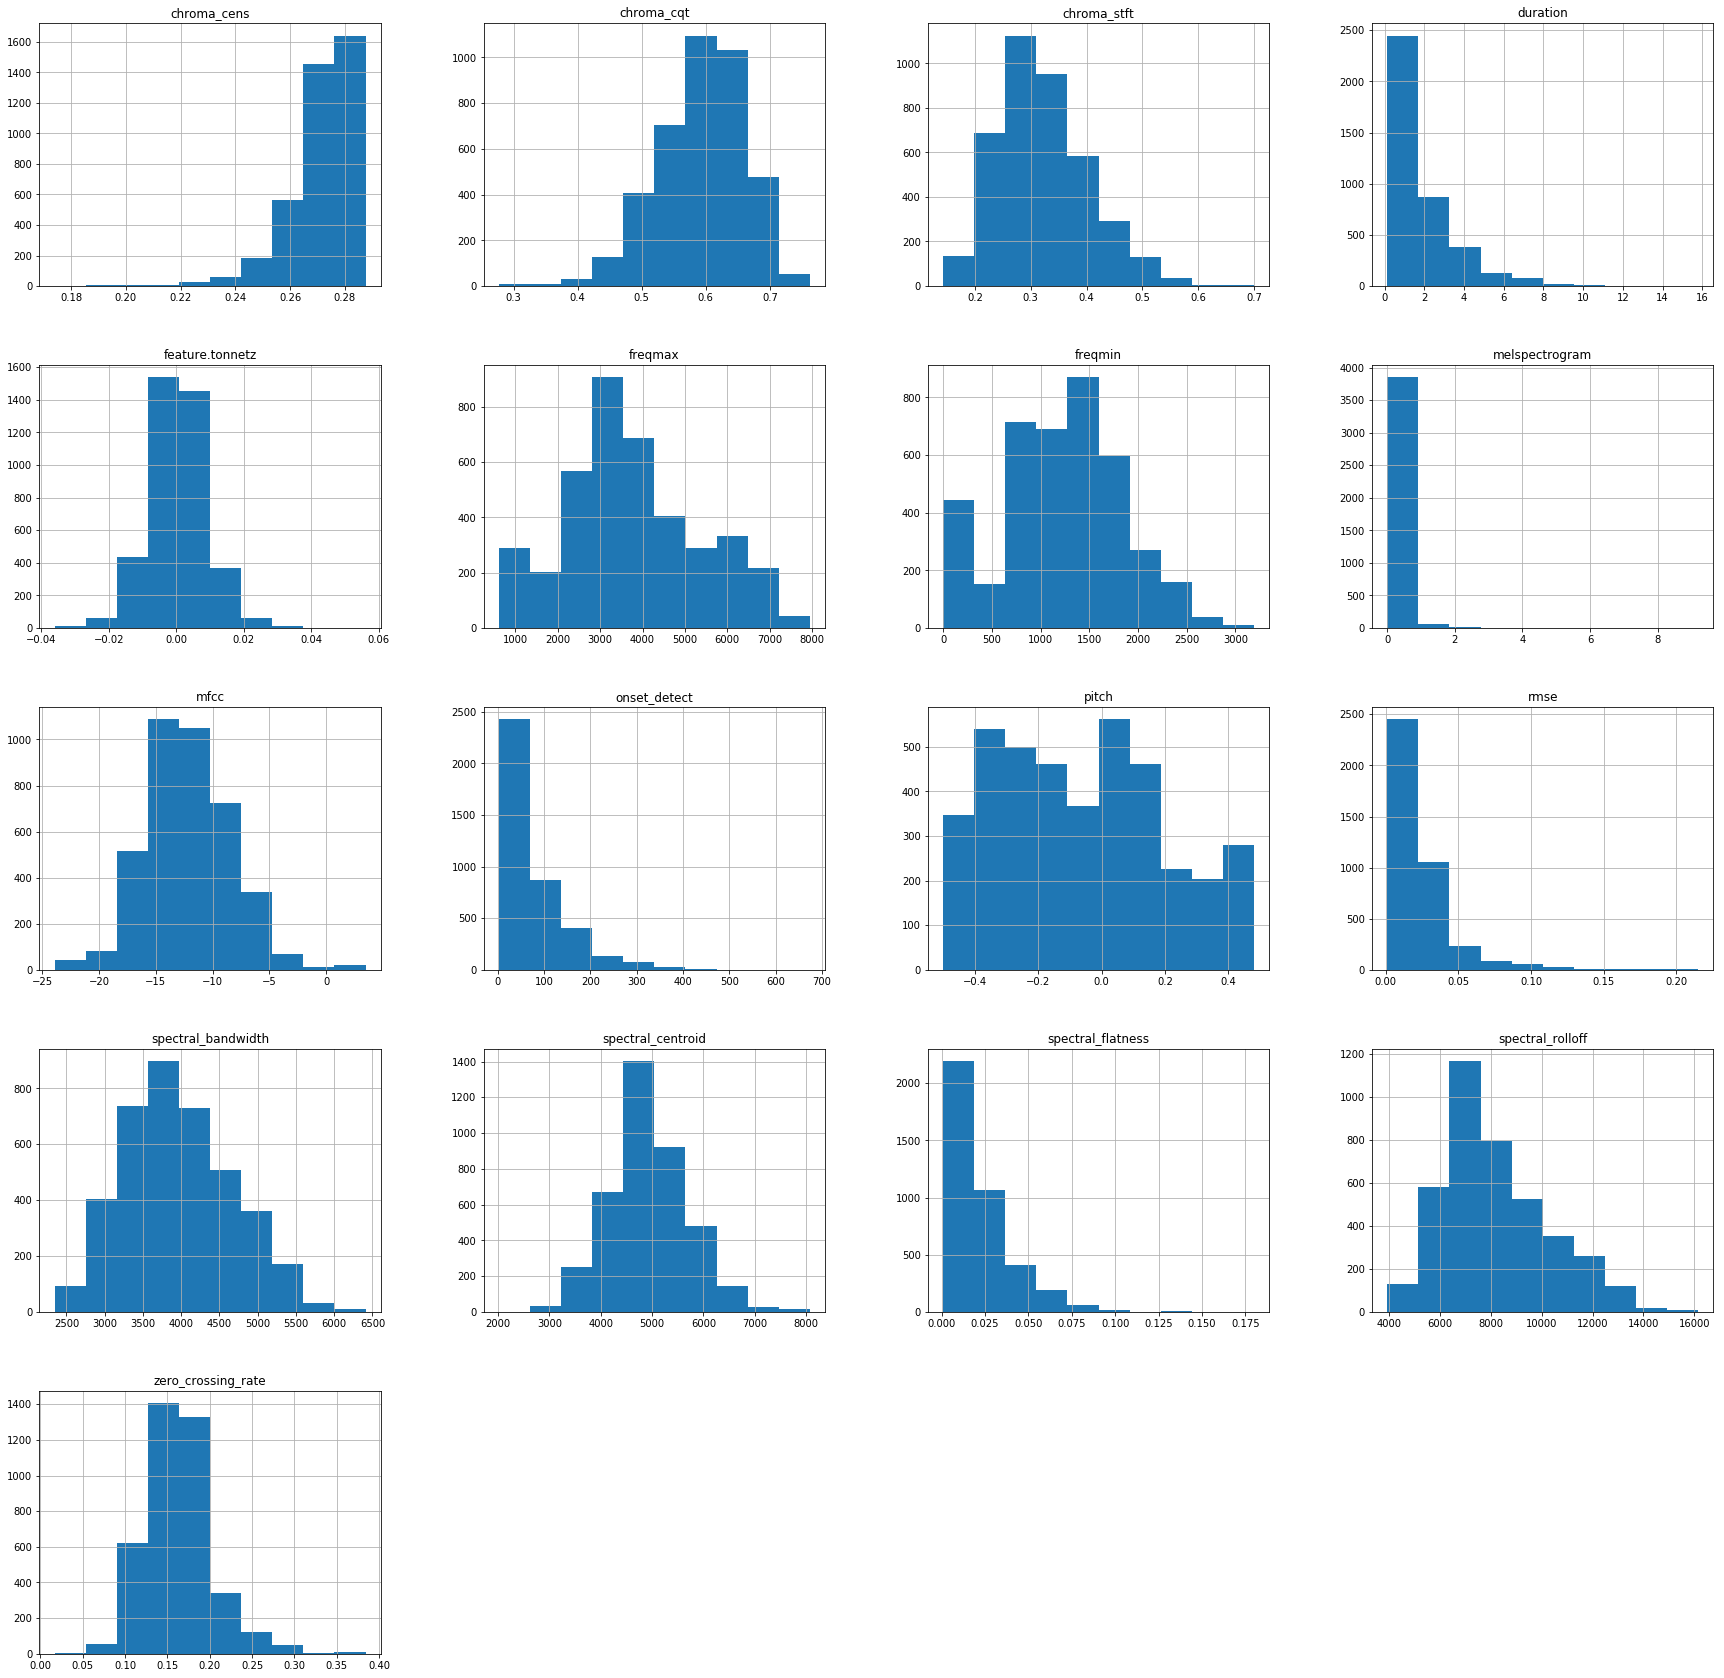

In [20]:
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
X.hist(ax=ax)
plt.show()

In [8]:
# APLICA ALGORITMO DE REGRESION LINEAL
####################################################
#LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
LR = LogisticRegression(random_state=0, solver='sag', multi_class='multinomial').fit(X_train, y_train)
pred = LR.predict(X_test)
round(LR.score(X_test,y_test), 4)
#print(classification_report(y_test, pred))
#print(confusion_matrix(y_test, pred))

0.6813

In [9]:
# APLICA ALGORITMO DE MAQUINA DE SOPORTE VECTORIAL
####################################################
SVM = svm.SVC(decision_function_shape="ovo", gamma='auto').fit(X_train, y_train)
pred = SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)
#print(classification_report(y_test, pred))

0.5858

In [10]:
# APLICA ALGORITMO DE BOSQUES ALEATORIOS
####################################################
RF = RandomForestClassifier(n_estimators=1000, max_depth=25, random_state=0).fit(X_train, y_train)
pred = RF.predict(X_test)
round(RF.score(X_test, y_test), 4)
#print(classification_report(y_test, pred))

0.9174

In [25]:
#importances = RF.feature_importances_
#print(importances)
features_name =['chroma_stft', 'duration', 'freqmax', 'freqmin', 'rmse', 'spectral_bandwidth', 'spectral_centroid', 'spectral_rolloff', 'zero_crossing_rate','mfcc', 'melspectrogram', 'pitch']
feature_imp = pd.Series(RF.feature_importances_,index=features_name).sort_values(ascending=False)
feature_imp

freqmax               0.214542
freqmin               0.166414
duration              0.165749
chroma_stft           0.071977
mfcc                  0.056921
zero_crossing_rate    0.056051
spectral_centroid     0.054787
spectral_bandwidth    0.050900
spectral_rolloff      0.049545
melspectrogram        0.049063
rmse                  0.046128
pitch                 0.017923
dtype: float64

In [11]:
# APLICA ALGORITMO DE REDES NERONALES
####################################################
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(200, 25), random_state=0).fit(X_train, y_train)
pred = NN.predict(X_test)
round(NN.score(X_test, y_test), 4)
#print(classification_report(y_test, pred))

0.7923

In [12]:
# APLICA ALGORITMO DE ARBOLES DE DECISION
####################################################
TREE = DecisionTreeClassifier().fit(X_train, y_train)
pred = TREE.predict(X_test)
round(TREE.score(X_test, y_test), 4)
#print(classification_report(y_test, pred))

0.8065

In [13]:
# APLICA ALGORITMO DE NAIVE BAYES
####################################################
GNB = GaussianNB().fit(X_train, y_train)
pred = GNB.predict(X_test)
round(GNB.score(X_test, y_test), 4)
#print(classification_report(y_test, pred))

0.7097

In [14]:
# APLICA ALGORITMO DE VECINOS MAS CERCANOS
####################################################
n_neighbors = 1
KNN = KNeighborsClassifier(n_neighbors).fit(X_train, y_train)
pred = KNN.predict(X_test)
round(KNN.score(X_test, y_test), 4)
#print(classification_report(y_test, pred))

0.8077

In [15]:
# EJEMPLO DE CLASIFICACION
#  7_Galbula_leucogastra
##################################################
NewCorte = 'C:\\Data\\2_Preprocesamiento\\Pruebas_5\\df_0_Sin_clasificar.csv'
dfCorte = pd.read_csv(NewCorte,sep=',')
dfCorte.head(10)
A = dfCorte[['chroma_stft', 'duration', 'freqmax', 'freqmin', 'rmse', 'spectral_bandwidth', 'spectral_centroid', 'spectral_rolloff', 'zero_crossing_rate','mfcc', 'melspectrogram', 'pitch']].values

# NORMALIZA
A = scaler.transform(A)
print(A)

[[5.51016426e-01 1.05304710e-01 3.66412190e-01 4.38772491e-01
  2.76857902e-02 5.88996469e-01 5.00749767e-01 5.88089231e-01
  3.54659950e-01 4.43778143e-01 5.94118081e-04 9.08163265e-01]]


In [16]:
print('Con REGRESION LINEAL la especie es: ')
print(LR.predict(A))

Con REGRESION LINEAL la especie es: 
['21_Thamnophilus_amazonicus']


In [17]:
print('Con MAQUINAS DE SOPORTE VECTORIAL la especie es: ')
print(SVM.predict(A))

Con MAQUINAS DE SOPORTE VECTORIAL la especie es: 
['21_Thamnophilus_amazonicus']


In [18]:
print('Con BOSQUES ALEATORIOS la especie es: ')
print(RF.predict(A))

Con BOSQUES ALEATORIOS la especie es: 
['13_Myrmotherula_axillaris']


In [19]:
print('Con REDES NEURONALES la especie es: ')
print(NN.predict(A))

Con REDES NEURONALES la especie es: 
['10_Hypocnemis_cantator']


In [20]:
print('Con ARBOLES DE DECISION la especie es: ')
print(TREE.predict(A))

Con ARBOLES DE DECISION la especie es: 
['18_Ramphastos_tucanus']


In [21]:
print('Con NAIVE BAYES la especie es: ')
print(GNB.predict(A))

Con NAIVE BAYES la especie es: 
['7_Galbula_leucogastra']


In [22]:
print('Con VECINOS MAS CERCANOS la especie es: ')
print(KNN.predict(A))

Con VECINOS MAS CERCANOS la especie es: 
['2-Attila_citriniventris']
